In [1]:
import os
# from collections import OrderedDict

os.environ['TRANSFORMERS_OFFLINE'] = '1'

global attention_map
attention_map = []

In [2]:
import torch
from transformers import AutoTokenizer
from models import DecoderOnlyTransformer
from config import *
from generate_utils import *
from utils import *

In [3]:
tokenizer = AutoTokenizer.from_pretrained(CONFIG['tokenizer'])
CONFIG['vocab_size'] = tokenizer.vocab_size

config_check()
model = DecoderOnlyTransformer(CONFIG).to(CONFIG['device'])
model.apply_attention_map()
model.load_state_dict(torch.load('ckpts/DecoderOnlyTransformer.pth', weights_only=True), strict=False)

CONFIG:{'d_model': 768, 'max_seq_length': 64, 'num_heads': 12, 'decoder_depth': 12, 'ffn_dim': 3072, 'dropout': 0.1, 'vocab_size': 30522, 'device': 'cuda', 'tokenizer': 'google-bert/bert-base-uncased'}
Model Parameters: 132,003,642


_IncompatibleKeys(missing_keys=[], unexpected_keys=['decoder.decoder_blocks.0.cross_attention.Q_norm.weight', 'decoder.decoder_blocks.0.cross_attention.Q_norm.bias', 'decoder.decoder_blocks.0.cross_attention.K_norm.weight', 'decoder.decoder_blocks.0.cross_attention.K_norm.bias', 'decoder.decoder_blocks.0.cross_attention.V_norm.weight', 'decoder.decoder_blocks.0.cross_attention.V_norm.bias', 'decoder.decoder_blocks.0.cross_attention.Q_map.weight', 'decoder.decoder_blocks.0.cross_attention.Q_map.bias', 'decoder.decoder_blocks.0.cross_attention.K_map.weight', 'decoder.decoder_blocks.0.cross_attention.K_map.bias', 'decoder.decoder_blocks.0.cross_attention.V_map.weight', 'decoder.decoder_blocks.0.cross_attention.V_map.bias', 'decoder.decoder_blocks.0.cross_attention.fc.weight', 'decoder.decoder_blocks.0.cross_attention.fc.bias', 'decoder.decoder_blocks.1.cross_attention.Q_norm.weight', 'decoder.decoder_blocks.1.cross_attention.Q_norm.bias', 'decoder.decoder_blocks.1.cross_attention.K_norm.w

In [4]:
GENERATE_CONFIG['temperature'] = 0.8
GENERATE_CONFIG['greedy'] = False

context = "apple computer and intel"
context_generate(context, model, tokenizer)

["apple computer and intel corp. ' s popular software program the suit filed in minneapolis federal court claims that apple violated a quickview patent that allows computer users to display only portions of multiple fields on a computer screen with the ability to see the entire of any given field the program",
 "apple computer and intel corp. ' s n microprocessor that introduction comes only two weeks after compaq computer corp. it had a lead of three to six months on competitors introduced the first u. s. notebook computer with such features despite the inevitable comparison with",
 "apple computer and intel corp. for the emerging market for risc machines risc technology speeds up a computer by the internal software for mips which expects revenue of $ n million this year allies such as control data are essential to attract software developers to the company ' s ri",
 'apple computer and intel corp. starting next year through olivetti usa and through its unit which specializes in netwo

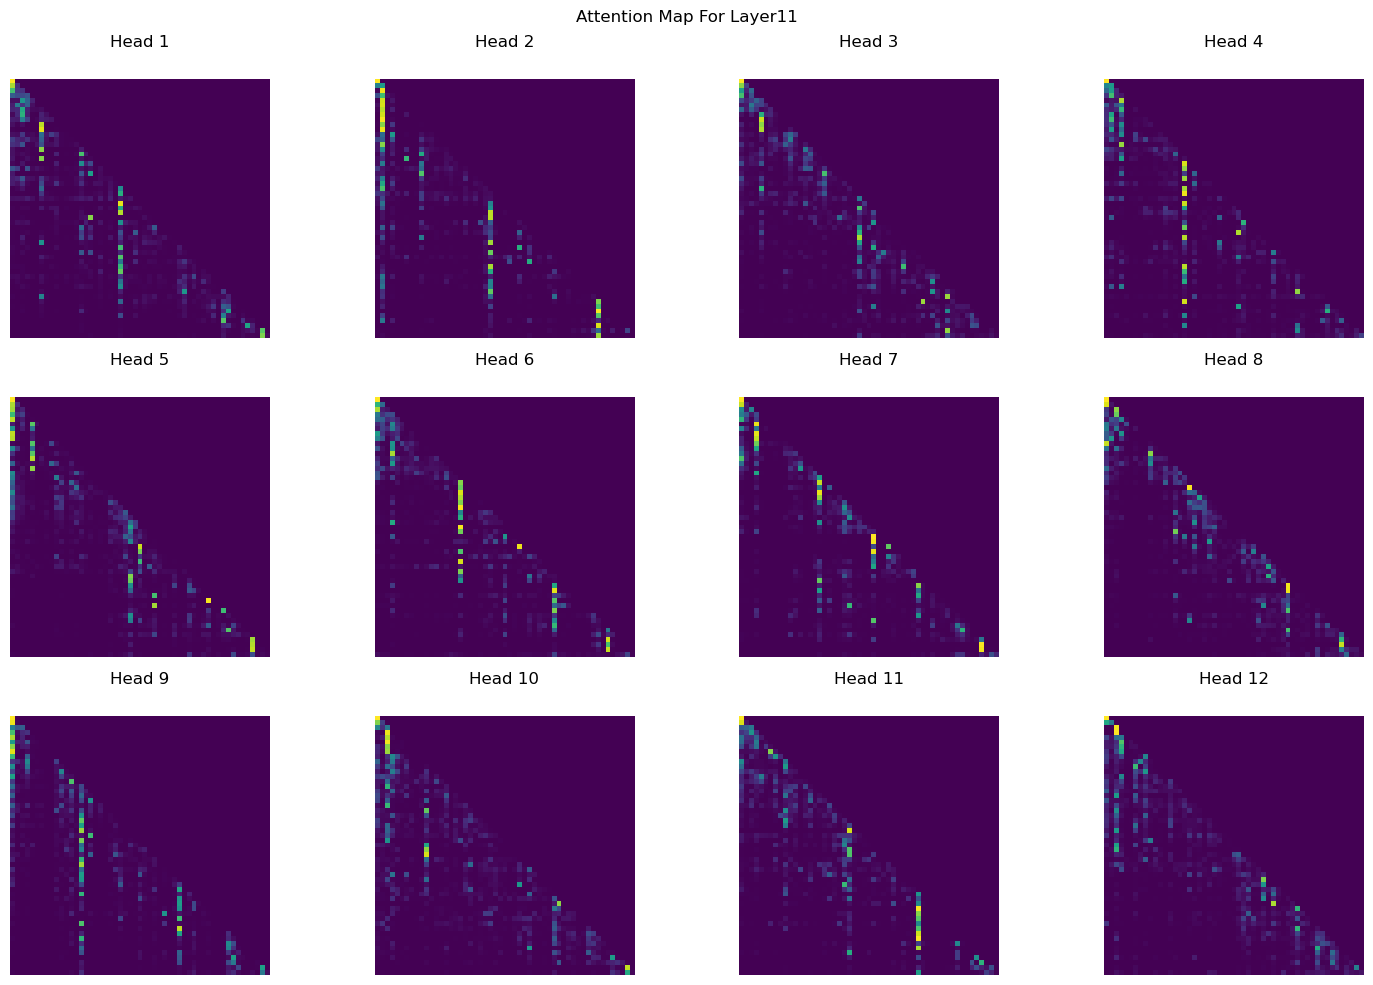

In [5]:
plot_attention(model, layer=11, batch_idx=1)